# How the intersubject activity evolves across levels

--- 

Here we're asking the question: How does the intersubject similarity evolve across levels? If we pick a certain region, for a given subject, is the intersubject similarity higher or lower across levels? 

*One prediction is*: if the region is involved in theory updating and learning then we expect a higher similarity for higher levels. As they learn more about the games (i.e. practice) subjects should converge to more similar voxel activation patterns. This might indicate that peoples' representations become more similar (displayed by a larger ISC). In Bayesian terms, people start off with different priors but their posteriors will converge because they get more data. 

--- 

<img src="http://drive.google.com/uc?export=view&id=1aJrScYoDMPCpz__QT3cXItb4GSyEzb2Z" style="height:300px"/>


In [9]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os 
import glob
import time
import numpy as np
import pandas as pd 

from nilearn import datasets, image
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from nibabel.affines import apply_affine
import nibabel as nib

from brainiak import image, io
from brainiak.isc import isc, isfc, permutation_isc
from brainiak.isc import compute_summary_statistic
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns 
import pandas as pd
from importlib import reload 
import scipy.io as sio
from scipy import stats
from numpy.linalg import inv

# import own functions
import utils
reload(utils)

%matplotlib inline
sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

In [2]:
# specify local path
path = '/Users/Daphne/data/'

# load relevant data
levels_betas = np.load(path+'bold_data_levels.npy')

# load mask and get voxel coordinates
mask_arr = np.load(path+'mask_arr.npy') # all masks are the same
mask_mat = mask_arr[0] # so we can pick any one from the array
coords_mat = np.array(np.where(mask_mat == 1)) # so need one set of voxel coordinates for all
coords_mat[[0, 2]] = coords_mat[[2, 0]] # exchange the rows

# mask_nii is the functional mask, this selects the brain voxels
mask_nii = nib.load(os.path.join(path, 'mask.nii')) 

# this where we plot our mask ON (sometimes called brain_nii) - the anatomical/structural image
mean_nii = nib.load(os.path.join(path, 'mean.nii')) 

# inverse of the affine matrix: mni2cor
inv_affine = inv(mask_nii.affine) # get the transformation matrix

# 0. Voxel mni coordinates from momchil

The hypothesis is that there is a region or set of regions that *encode the theory* and a set of regions responsible for *updating the theory*. We expect these two regions to communicate with each other.

### Theory ROIs (model-based, from [slide](https://docs.google.com/presentation/d/1pc7FJeyOrG5_aXU1bLK-CjvCFcj9oPAjLiITQPtyllg/edit#slide=id.g8db8e3dacc_0_272)), in order of importance:

> Encoding the theory

In [7]:
R_IFG_Tri_E = [42, 28, 26]
L_Insula_E = [-30, 28, 2]
R_DMPFC_E = [6, 38, 40]
L_IFG_Tri_E = [-50, 44, 12]
L_MTG_E = [-64, -50, 4]
R_MTG_E = [58, -36, 8]

### Theory_change_flag ROIs (model-based, from [slide](https://docs.google.com/presentation/d/1pc7FJeyOrG5_aXU1bLK-CjvCFcj9oPAjLiITQPtyllg/edit#slide=id.g8db8e3dacc_0_334))

> Updating the theory

In [8]:
R_IFG_Oper_U = [48, 12, 28]
L_PPC_U = [-56, -32, 46]
R_IFG_Tri_U = [52, 38, 16]
R_AG_U = [32, -60, 34]
L_Fusiform_U = [-40, -58, -12]
L_IFG_Oper_U = [-42, 4, 28]
R_PHC_U = [26, -42, -8]

> First we translate the `mni coordinates` to `native space`

MNI space has coordinates from $-a$ to $+a$ (it has negative values). 
The transformed coordinates should be positive, within $(79,95,79)$,

- Use the inverse affine matrix $A^{-1}$ to go from mni space $\rightarrow$ native coordinates (native voxel space).
- Use the affine matrix $A$ for native coordinates $\rightarrow$ mni

[apply_affine](https://nipy.org/nibabel/reference/nibabel.affines.html#apply-affine)

> Then we have the coords in native space and get the corresponding voxel


# For voxel $k$, what is the isc across levels?

Let's say we obtain a number of voxels that are interesting to us. These voxels indicate ROI's and we obtain them either from literature or our own analysis (see below & momchil's voxels given). Then we want to know, for that given voxel, which stands for a specific region brain, what is the ISC?

To test our hypothesis, we rearranged the betas so that each array contains the betas for a given level. As such we can see how the r value evolves over levels. The error bars: $SE_x = \frac{\sigma}{\sqrt(n)}$

# 1. Theory encoding ROIs 

The coordinates correspond to voxel: 146217.
Getting the intersubject corelations for voxel 146217


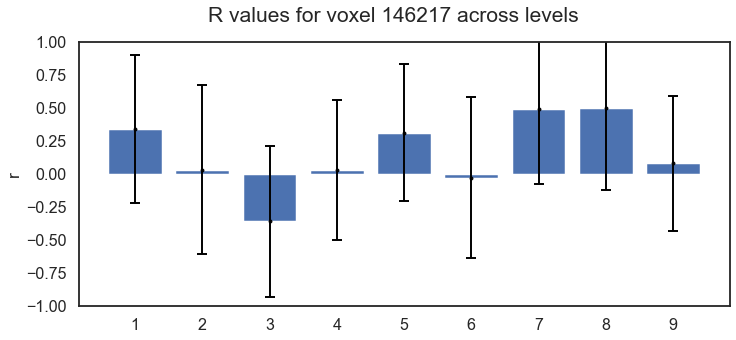

In [11]:
# === CHOOSE REGION ===
mni_coords = R_IFG_Tri_E
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 89655.
Getting the intersubject corelations for voxel 89655


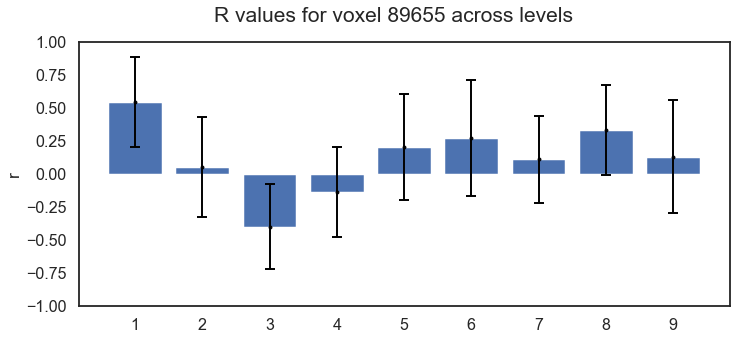

In [12]:
# === CHOOSE REGION ===
mni_coords = L_Insula_E
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 175423.
Getting the intersubject corelations for voxel 175423


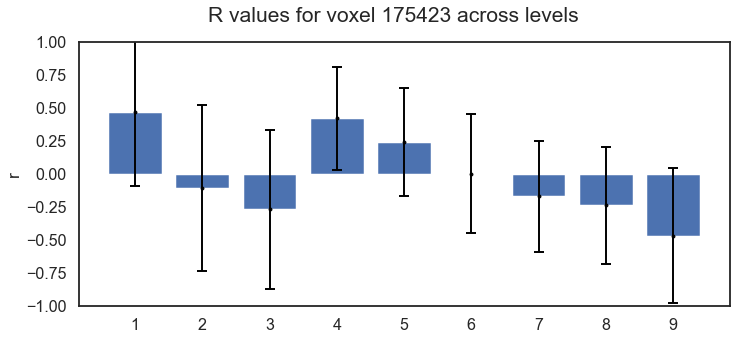

In [13]:
# === CHOOSE REGION ===
mni_coords = R_DMPFC_E
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 114273.
Getting the intersubject corelations for voxel 114273


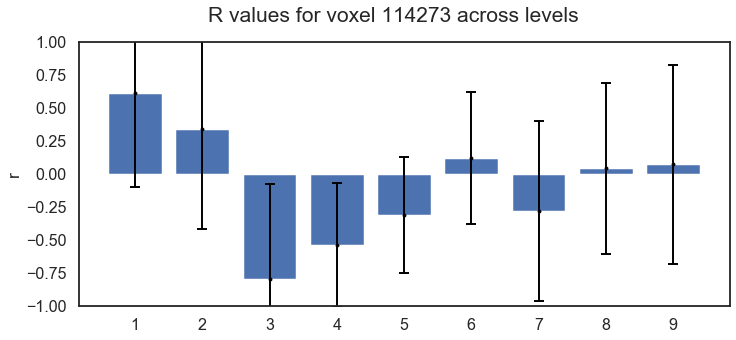

In [14]:
# === CHOOSE REGION ===
mni_coords = L_IFG_Tri_E
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 91966.
Getting the intersubject corelations for voxel 91966


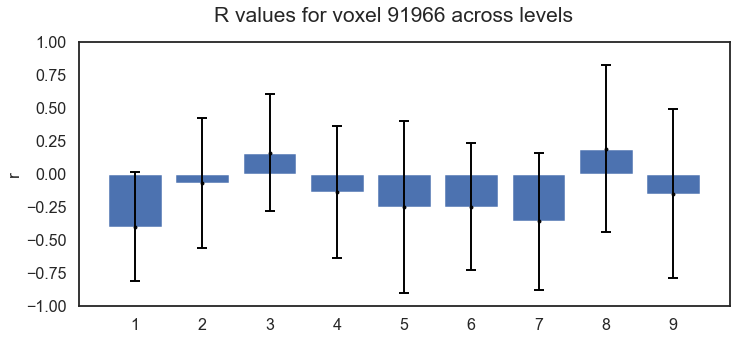

In [15]:
# === CHOOSE REGION ===
mni_coords = L_MTG_E
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 102081.
Getting the intersubject corelations for voxel 102081


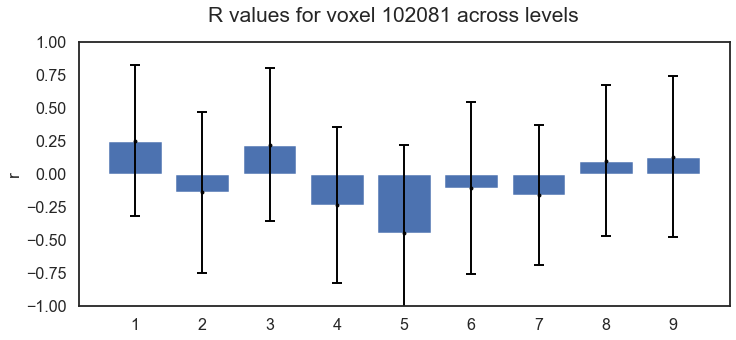

In [16]:
# === CHOOSE REGION ===
mni_coords = R_MTG_E
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

# 2. Theory updating ROIs (change_flag)

The coordinates correspond to voxel: 150132.
Getting the intersubject corelations for voxel 150132


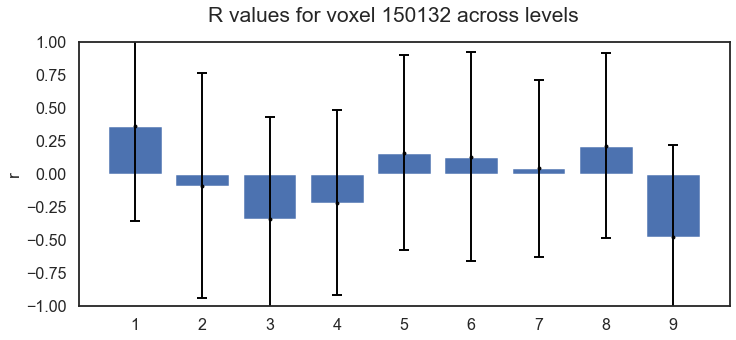

In [18]:
# === CHOOSE REGION ===
mni_coords = R_IFG_Oper_U
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 184359.
Getting the intersubject corelations for voxel 184359


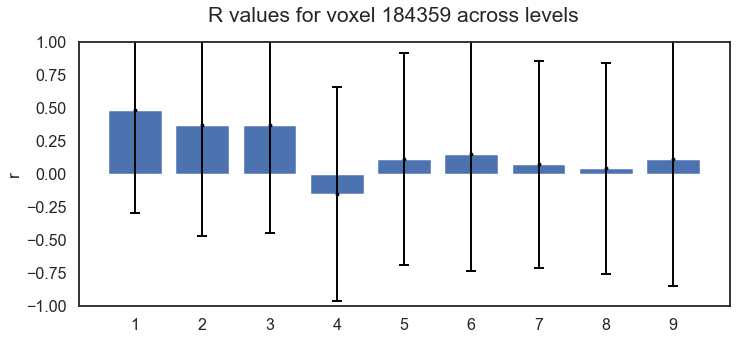

In [19]:
# === CHOOSE REGION ===
mni_coords = L_PPC_U
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 123560.
Getting the intersubject corelations for voxel 123560


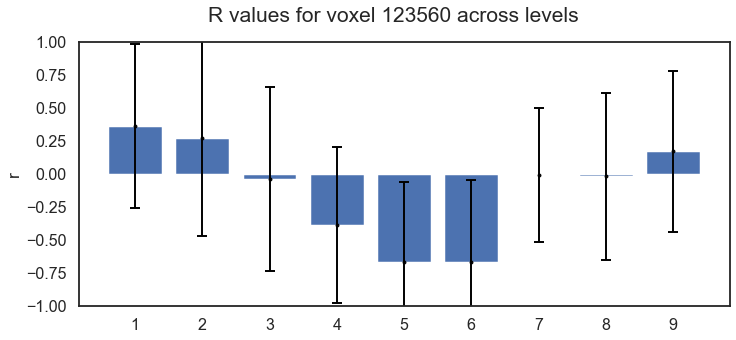

In [20]:
# === CHOOSE REGION ===
mni_coords = R_IFG_Tri_U
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 160565.
Getting the intersubject corelations for voxel 160565


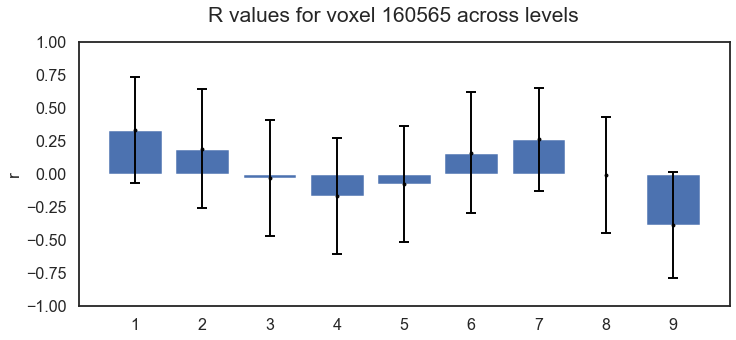

In [21]:
# === CHOOSE REGION ===
mni_coords = R_AG_U
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 53783.
Getting the intersubject corelations for voxel 53783


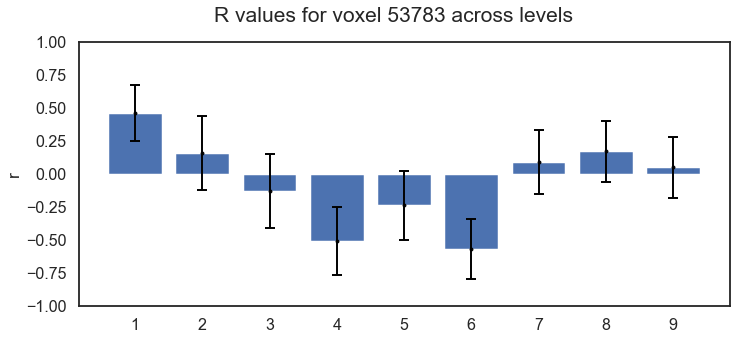

In [22]:
# === CHOOSE REGION ===
mni_coords = L_Fusiform_U
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 149930.
Getting the intersubject corelations for voxel 149930


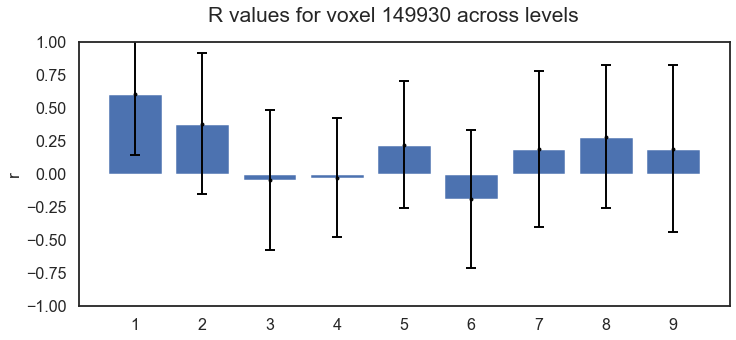

In [23]:
# === CHOOSE REGION ===
mni_coords = L_IFG_Oper_U
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);

The coordinates correspond to voxel: 63462.
Getting the intersubject corelations for voxel 63462


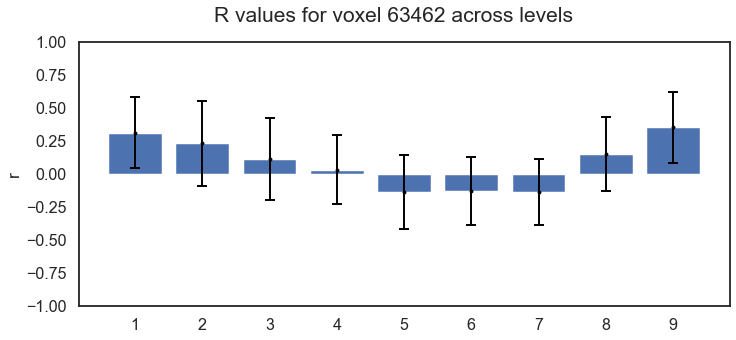

In [24]:
# === CHOOSE REGION ===
mni_coords = R_PHC_U
# =====================

native_coords = apply_affine(aff=inv_affine, pts=mni_coords) # from mni2cor

top_vox = utils.get_vox_from_coords(coords_mat, native_coords) # corresponding voxel

# run iscs for this voxel
isc_r_values_levels, error_bars = utils.get_iscs_across_levels(levels_betas=levels_betas, T=top_vox)

# plot r values with error bars
utils.plot_r_values_levels(top_vox, isc_r_values_levels, error_bars);